### Aim 
Create scatterplots (volcano/MA-plots) for the mass spectrometry data for DevPF1-HA and DevPF2-GFP pulldown

In [1]:
# import packages
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

plt.rcParams["font.family"] = "Arial"

In [2]:
input1 = ['input_files/Limma_results_DevPF1.csv.gz','input_files/Limma_results_DevPF2.csv.gz']

dPF1 = pd.read_csv(input1[0], compression = 'gzip', sep=",")
dPF2 = pd.read_csv(input1[1], compression = 'gzip', sep=",")

input2 = ['input_files/P2854_TMT16plex_5prc_psm_DevPF1.tsv.gz', 
          'input_files/P2854_TMT8plex_5prc_psm_DevPF2.tsv.gz']

dPF1_peptides = pd.read_csv(input2[0], compression = 'gzip', sep="\t")
dPF2_peptides = pd.read_csv(input2[1], compression = 'gzip', sep="\t")

In [3]:
dPF1['-log10(p)'] = np.log10(dPF1['pvalue']) * (-1)
dPF2['-log10(p)'] = np.log10(dPF2['pvalue']) * (-1)

## DevPF2 dataset analysis

In [4]:
# genes of interest in DevPF2 MS data

#PTIWI09,H4,H2A,DevPF1
interest_list2 = ['PTIWI10','GSPATT00001397001','GSPATT00025378001','GSPATT00009444001']


inter2 = dPF2.loc[dPF2['Gene'].isin(interest_list2)]
inter2 = inter2[['comparison','Gene','logFC','-log10(p)','hit_annotation']]

    
# additionals to consider: Importin alpha 1b ,'GSPATT00000526001'

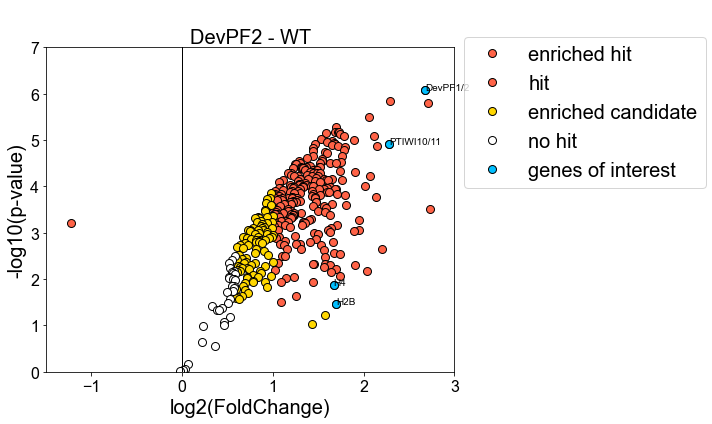

In [5]:
fig, ax = plt.subplots(figsize = (10,6))

groups = dPF2.groupby('hit_annotation')
#groups.reindex(['enriched hit', 'hit', 'enriched candidate', 'no hit'], level='hit_annotation')

colors = ['tomato', 'tomato', 'gold', 'white']
count = int(-1)
category = ['enriched hit', 'hit', 'enriched candidate', 'no hit']

for cat in category:
    count += 1
    for name, group in groups:
        if name == cat:
            ax.plot(group.logFC, group['-log10(p)'], marker='o', linestyle='', markersize=8, label=name,
            markeredgecolor='black', markerfacecolor = colors[count])

# plot genes of interest
ax.plot(inter2['logFC'], inter2['-log10(p)'], marker='o', linestyle='', 
                                     markersize=8, label= 'genes of interest', markeredgecolor='black', 
                                     markerfacecolor = 'deepskyblue')
# label data points
ax.annotate('PTIWI10/11', textcoords='data',
            xy= (inter2.loc[inter2['Gene'] == 'PTIWI10'].logFC, 
                 inter2.loc[inter2['Gene'] == 'PTIWI10']['-log10(p)']))
ax.annotate('H4', textcoords='data',
            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00001397001'].logFC, 
                            inter2.loc[inter2['Gene'] == 'GSPATT00001397001']['-log10(p)']))
ax.annotate('H2B', textcoords='data',
            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00025378001'].logFC, 
                            inter2.loc[inter2['Gene'] == 'GSPATT00025378001']['-log10(p)']))
ax.annotate('DevPF1/2', textcoords='data',
            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00009444001'].logFC, 
                            inter2.loc[inter2['Gene'] == 'GSPATT00009444001']['-log10(p)']))

ax.set_title(' \nDevPF2 - WT', wrap = True, fontsize = 20)
ax.set_xlabel('log2(FoldChange)', wrap = True, fontsize = 20)
ax.set_ylabel('-log10(p-value)', wrap = True, fontsize = 20)
ax.set_xlim(-1.5,3.0)
ax.set_ylim(0,7.0)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.axvline(x=0, ymin=0, ymax=7, ls='-', color='black', lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.80), fancybox=True, fontsize = 20);
fig.tight_layout()

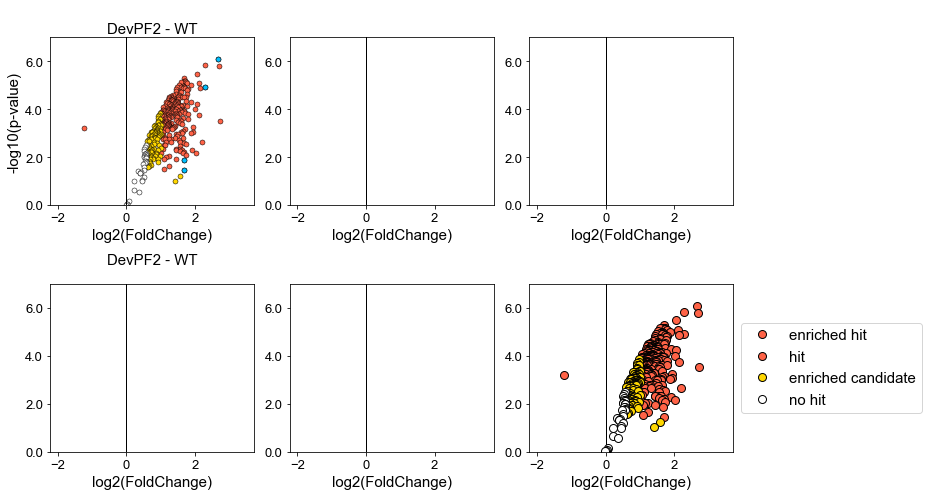

In [120]:
fig, axes = plt.subplots(2, 3,figsize = (13,7))
ax1, ax2, ax3 = axes[0]
ax4, ax5, ax6 = axes[1]

groups = dPF2.groupby('hit_annotation')
#groups.reindex(['enriched hit', 'hit', 'enriched candidate', 'no hit'], level='hit_annotation')

colors = ['tomato', 'tomato', 'gold', 'white']
count = int(-1)
category = ['enriched hit', 'hit', 'enriched candidate', 'no hit']

x_max2 = (max(dPF2['logFC']))
x_min2 = (min(dPF2['logFC']))
y_max2 = (max(dPF2['-log10(p)']))

for cat in category:
    count += 1
    for name, group in groups:
        if name == cat:
            ax1.plot(group.logFC, group['-log10(p)'], marker='o', linestyle='', markersize=5, label=name,
            markeredgecolor='black', markerfacecolor = colors[count], markeredgewidth = 0.5)

# plot genes of interest
ax1.plot(inter2['logFC'], inter2['-log10(p)'], marker='o', linestyle='', 
                                     markersize=5, label= 'genes of interest', markeredgecolor='black', 
                                     markerfacecolor = 'deepskyblue', markeredgewidth = 0.5)            

# just to fill for legend


# label data points
#ax1.annotate('PTIWI10/11', textcoords='data',
#            xy= (inter2.loc[inter2['Gene'] == 'PTIWI10'].logFC, 
#                 inter2.loc[inter2['Gene'] == 'PTIWI10']['-log10(p)']))
#ax1.annotate('H4', textcoords='data',
#            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00001397001'].logFC, 
#                            inter2.loc[inter2['Gene'] == 'GSPATT00001397001']['-log10(p)']))
#ax1.annotate('H2A', textcoords='data',
#            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00025378001'].logFC, 
#                            inter2.loc[inter2['Gene'] == 'GSPATT00025378001']['-log10(p)']))
#ax1.annotate('DevPF1/2', textcoords='data',
#            xy= (inter2.loc[inter2['Gene'] == 'GSPATT00009444001'].logFC, 
#                            inter2.loc[inter2['Gene'] == 'GSPATT00009444001']['-log10(p)']))

ax1.set_xlim((x_min2 - 1), (x_max2 + 1))
ax1.set_ylim(0, (y_max2+1))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axvline(x=0, ymin=0, ymax=7, ls='-', color='black', lw=1)
ax1.set_xlabel('log2(FoldChange)', wrap = True, fontsize = 15)
ax1.set_ylabel('-log10(p-value)', wrap = True, fontsize = 15)
ax1.set_title(' \nDevPF2 - WT', wrap = True, fontsize = 15)

# just to make the figure the same dimensions as the DevPF1 figure --> include ax6
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
ax_count = int(-1)
for a in ax:
    ax_count += 1
    a.set_xlim((x_min2 - 1), (x_max2 + 1))
    #a.set_ylim(0, (y_max2 + 1))
    a.set_ylim(0, 7)
    a.tick_params(axis='both', which='major', labelsize=13)
    a.axvline(x=0, ymin=0, ymax=7, ls='-', color='black', lw=1)
    a.set_xlabel('log2(FoldChange)', wrap = True, fontsize = 15)
    a.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


count = int(-1)
for cat in category:
    count += 1
    for name, group in groups:
        if name == cat:
            ax6.plot(group.logFC, group['-log10(p)'], marker='o', linestyle='', markersize=8, label=name,
            markeredgecolor='black', markerfacecolor = colors[count])

ax4.set_title('DevPF2 - WT\n ', wrap = True, fontsize = 15)
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, fontsize = 15);

fig.tight_layout()

fig.savefig(f"output_files/DevPF2_MS_volcano_nolabel.png", dpi = 300,\
                    bbox_inches = 'tight')

## DevPF1 dataset analysis (more comparisons)

In [6]:
# create sub-dataframes


comparisons = ['PS17_E - WT_E','PS17_L - WT_L','PS17_L - PS17_E','WT_L - WT_E',
               '(PS17_L - PS17_E) - (WT_L - WT_E)', '(PS17_L - WT_L) - (PS17_E - WT_E)']
counter = int(-1)
dfs = []

for c in comparisons:
    counter += 1
    df = dPF1.loc[dPF1['comparison']==comparisons[counter]]
    dfs.append(df)


In [7]:
# genes of interest in DevPF1 MS dataset
interest = []

#PTIWI09,H4,H2A,DevPF1
interest_list = ['PTIWI09','GSPATT00001397001','GSPATT00025378001','GSPATT00009444001']

for df in dfs:
    inter = df.loc[df['Gene'].isin(interest_list)]
    inter = inter[['comparison','Gene','logFC','-log10(p)','hit_annotation']]
    interest.append(inter)
    
# additionals to consider: Importin alpha 1b ,'GSPATT00000526001'

In [8]:
# create data frames to annote genes of interest in plot
enriched_hits = []
PTIWI19 = []
H_4 = []
H_2A = []
H_2B = []
DevPF12 = []

for df in dfs:
    e_hit = df.loc[df['hit_annotation'] == 'enriched hit']
    enriched_hits.append(e_hit)

for df in dfs:
    P19 = df.loc[df['Gene'] == 'PTIWI09']
    P19 = P19[['Gene','logFC','-log10(p)']]
    H4 = df.loc[df['Gene'] == 'GSPATT00001397001']
    H4 = H4[['Gene','logFC','-log10(p)']]
    H2A = df.loc[df['Gene'] == 'GSPATT00013999001']
    H2A = H2A[['Gene','logFC','-log10(p)']]
    H2B = df.loc[df['Gene'] == 'GSPATT00025378001']
    H2B = H2B[['Gene','logFC','-log10(p)']]
    D12 = df.loc[df['Gene'] == 'GSPATT00009444001']
    D12 = D12[['Gene','logFC','-log10(p)']]
    PTIWI19.append(P19)
    H_4.append(H4)
    H_2A.append(H2A)
    H_2B.append(H2B)
    DevPF12.append(D12)


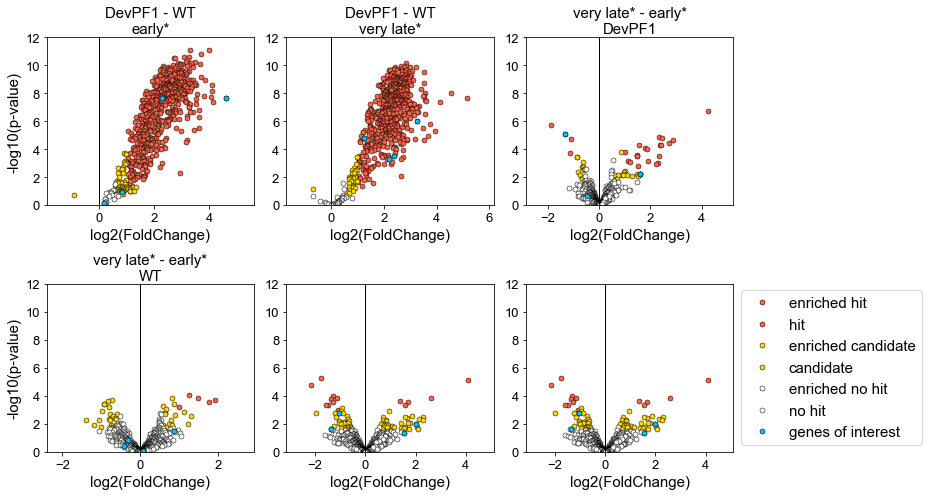

In [9]:
# volcano plots for the knockdown comparisons at each time point (with out "enriched" in catagory)

fig, axes = plt.subplots(2, 3,figsize = (13,7))
ax1, ax2, ax3 = axes[0]
ax4, ax5, ax6 = axes[1]


ax = [ax1, ax2, ax3, ax4, ax5, ax6]

colors = ['tomato', 'tomato', 'gold', 'gold','white', 'white']
category = ['enriched hit', 'hit', 'enriched candidate', 'candidate', 'enriched no hit', 'no hit']
ax_count = int(-1)
x_max = []
x_min = []
y_max = []
num_sig = []

#groups = resPN100.groupby('significance')
for df in dfs:
    groups = df.groupby('hit_annotation')
    #num_sig.append(sig_count(df))
    x_max.append(max(df['logFC']))
    x_min.append(min(df['logFC']))
    y_max.append(max(df['-log10(p)']))
    ax_count += 1
    c_count = int(-1)
    for cat in category:
        c_count += 1
        for name, group in groups:
            if name == cat:
                ax[ax_count].plot(group.logFC, group['-log10(p)'], marker='o', linestyle='', 
                                     markersize=5, label=name, markeredgecolor='black', 
                                     markerfacecolor = colors[c_count], markeredgewidth = 0.5)
    ax[ax_count].plot(interest[ax_count]['logFC'], interest[ax_count]['-log10(p)'], marker='o', linestyle='', 
                                     markersize=5, label= 'genes of interest', markeredgecolor='black', 
                                     markerfacecolor = 'deepskyblue', markeredgewidth = 0.5)
    
ax_count = int(-1)
for a in ax:
    ax_count += 1
    a.set_xlim((x_min[ax_count] - 1), (x_max[ax_count] + 1))
    #a.set_ylim(0, (y_max[ax_count] + 1))
    a.set_ylim(0, 12)
    a.tick_params(axis='both', which='major', labelsize=13)
    a.axvline(x=0, ymin=0, ymax=7, ls='-', color='black', lw=1)
    a.set_xlabel('log2(FoldChange)', wrap = True, fontsize = 15)
    
    
    # label data points
    #a.annotate('PTIWI01/09', xy= (PTIWI19[ax_count]['logFC'], PTIWI19[ax_count]['-log10(p)']), textcoords='data')
    #a.annotate('H4', xy= (H_4[ax_count]['logFC'], H_4[ax_count]['-log10(p)']), textcoords='data')
    #a.annotate('H2B', xy= (H_2B[ax_count]['logFC'], H_2B[ax_count]['-log10(p)']), textcoords='data')
    #a.annotate('DevPF1/2', xy= (DevPF12[ax_count]['logFC'], DevPF12[ax_count]['-log10(p)']), textcoords='data')
    
    #if ax_count > 2:
    #    a.set_xlabel('log2(FoldChange)', wrap = True, fontsize = 17)
    if ax_count == 0 or ax_count == 3:
        a.set_ylabel('-log10(p-value)', wrap = True, fontsize = 15)



#set titles
ax1.set_title('DevPF1 - WT\nearly*', wrap = True, fontsize = 15)
ax2.set_title('DevPF1 - WT\nvery late*', wrap = True, fontsize = 15)
ax3.set_title('very late* - early*\nDevPF1', wrap = True, fontsize = 15)
ax4.set_title('very late* - early*\nWT', wrap = True, fontsize = 15)


# label data poitns




ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, fontsize = 15);
fig.tight_layout()

#fig.savefig(f"output_files/DevPF1_MS_volcano_nolabel_noenriched.png", dpi = 300,\
#                    bbox_inches = 'tight')

In [10]:
# save the output tables
res1 = pd.concat(interest, axis=0) 
res1.to_csv('output_files/DevPF1_MS_genes_of_interest.csv')
inter2.to_csv('output_files/DevPF2_MS_genes_of_interest.csv')

In [52]:
enriched_hits[2]

,Gene,Protein.ID,Protein.Description,Organism,found.in.files,found.in.file_P2854_TMT16plex_5prc_protein.tsv,found.in.conditions,found.in.reps,max.Unique.Peptides,max.Razor.Peptides,...,qval.fdrtool,lfdr.fdrtool,comparison,hit_annotation_method,pvalue,fdr,hit,hit_annotation,Total.Intensity,-log10(p)
1304,T1F,Q27172,Trichocyst matrix protein T1-F,Paramecium tetraurelia,1,1,4,4,0,2,...,1.358288e-13,1.358288e-13,PS17_L - PS17_E,limma,1.779047e-07,0.000116,True,enriched hit,5452193,6.749813
1305,GSPATT00036297001,A0C8P5,"Chromosome undetermined scaffold_159, whole ge...",Paramecium tetraurelia,1,1,4,4,0,3,...,5.378482e-08,1.848932e-05,PS17_L - PS17_E,limma,1.747737e-06,0.000570,True,enriched hit,1430138,5.757524
1306,PTIWI09,Q3SE53,"Chromosome undetermined scaffold_66, whole gen...",Paramecium tetraurelia,1,1,4,4,1,12,...,6.198964e-06,5.530203e-05,PS17_L - PS17_E,limma,7.724718e-06,0.001679,True,enriched hit,4415183,5.112117
1307,GSPATT00035387001,A0C641,"Chromosome undetermined scaffold_151, whole ge...",Paramecium tetraurelia,1,1,4,4,2,4,...,2.141059e-05,5.530203e-05,PS17_L - PS17_E,limma,1.332145e-05,0.001852,True,enriched hit,103369006,4.875448
1308,GSPATT00008359001,A0CM63,"Chromosome undetermined scaffold_21, whole gen...",Paramecium tetraurelia,1,1,4,4,0,3,...,2.748564e-05,5.530203e-05,PS17_L - PS17_E,limma,1.563155e-05,0.001852,True,enriched hit,6673473,4.805998
1309,GSPATT00012163001,A0D0P4,"pyruvate, phosphate dikinase",Paramecium tetraurelia,1,1,4,4,7,30,...,3.075050e-05,1.333498e-04,PS17_L - PS17_E,limma,1.704205e-05,0.001852,True,enriched hit,49675232,4.768478
1310,GSPATT00028551001,A0BG49,"Chromosome undetermined scaffold_105, whole ge...",Paramecium tetraurelia,1,1,4,4,0,11,...,5.155203e-05,1.333498e-04,PS17_L - PS17_E,limma,2.251613e-05,0.002097,True,enriched hit,20082218,4.647506
1311,GSPATT00036481001,A0CA84,"Chromosome undetermined scaffold_160, whole ge...",Paramecium tetraurelia,1,1,4,4,1,2,...,5.640032e-05,6.837947e-04,PS17_L - PS17_E,limma,8.667950e-05,0.004710,True,enriched hit,627662,4.062084
1312,TMP2D,Q6BGI3,"Chromosome undetermined scaffold_1, whole geno...",Paramecium tetraurelia,1,1,4,4,0,8,...,1.433887e-04,6.837947e-04,PS17_L - PS17_E,limma,3.676519e-05,0.002996,True,enriched hit,2921962,4.434563
1313,GSPATT00034866001,A0C3M0,"Chromosome undetermined scaffold_147, whole ge...",Paramecium tetraurelia,1,1,4,4,3,5,...,2.440469e-04,6.837947e-04,PS17_L - PS17_E,limma,5.022963e-05,0.003157,True,enriched hit,4116972,4.299040
